In [1]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group, InputSize

from pathlib import Path
from typing import List, Tuple, Dict

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "test" / "WarpPerShiftArgs")

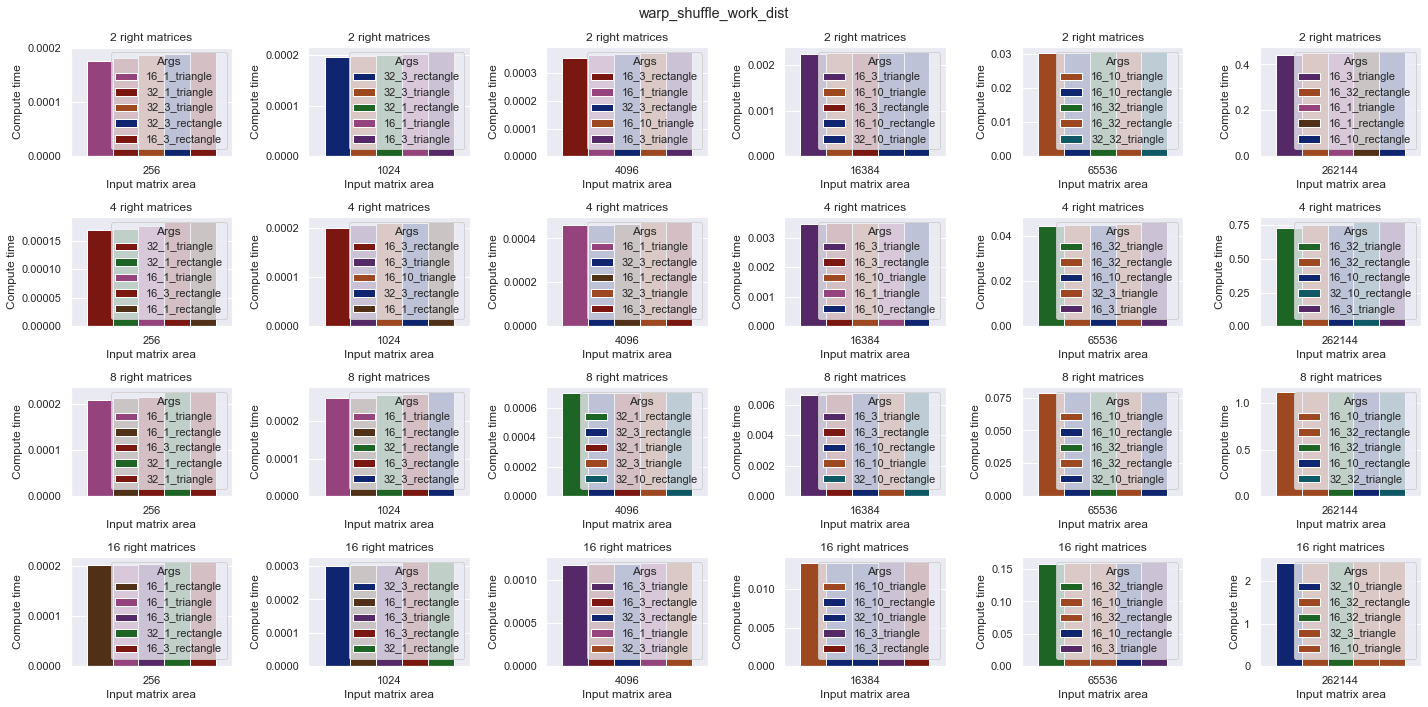

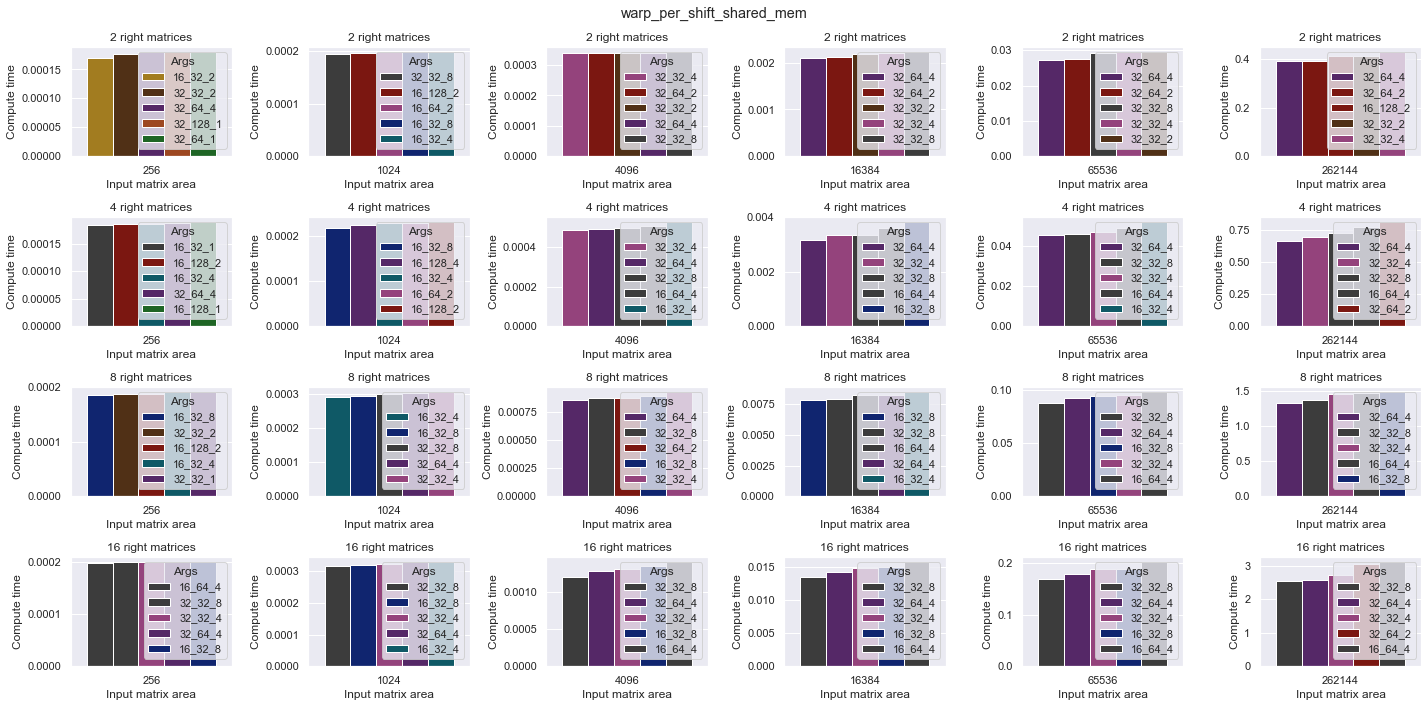

In [3]:

data_warp_shuffle = pd.concat([run.data for run in benchmark.groups["one_to_many"].runs], axis=0, ignore_index=True)
data_shared_mem = pd.concat([run.data for run in benchmark.groups["shared_mem"].runs], axis=0, ignore_index=True)
data = pd.concat([data_warp_shuffle, data_shared_mem], axis=0, ignore_index=True)
grouped = data.groupby(["Name", "Args", "Input right matrices", "Input matrix area"])
compute_times = grouped["Computation"].mean() / 1e9
compute_times.name = "Compute time"
results = compute_times.reset_index().sort_values("Compute time")

sns.set(rc={'figure.figsize': (20, 10)})
for name in results["Name"].unique():
    name_results = results[results["Name"] == name]
    args = sorted(results["Args"].unique())
    palette = dict(zip(args, sns.color_palette("dark", n_colors=len(args))))
    fig, axs = plt.subplots(nrows=results["Input right matrices"].nunique(), ncols=results["Input matrix area"].nunique())
    for plot_row, num_rights in enumerate(sorted(results["Input right matrices"].unique())):
        for plot_col, input_area in enumerate(sorted(results["Input matrix area"].unique())):
            filtered_result = name_results[(name_results["Input right matrices"] == num_rights) & (name_results["Input matrix area"] == input_area)]
            filtered_result = filtered_result.head(5)
            ax = sns.barplot(data=filtered_result, x="Input matrix area", y="Compute time", hue="Args", dodge=True,  palette=palette, ax=axs[plot_row][plot_col])

            ax.set_title(f"{num_rights} right matrices")
    # handles, labels = axs[0][0].get_legend_handles_labels()
    # fig.legend(handles, labels)
    # for ax in axs.reshape(-1):
    #     ax.legend([], [], frameon=False)

    fig.suptitle(name)
    fig.tight_layout()